# Liver Disease. 

Import Library

In [1]:
import numpy as np,pandas as pd
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)

In [2]:
df=pd.read_csv(r'IndianLiverPatientData.txt',header=None,index_col=0,delimiter='\t') 
df.head()

,1,2,3,4,5,6,7,8,9,10,11
0,,,,,,,,,,,
1,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,No
2,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,No
3,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,No
4,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,No
5,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,No


In [6]:
df.columns=['Age','Gender','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio','Class']
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Class
0,,,,,,,,,,,
1,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,No
2,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,No
3,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,No
4,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,No
5,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,No


# Preprocessing

In [7]:
df.isnull().sum()

Age                            0
Gender                        20
Total_Bilirubin                0
Direct_Bilirubin               0
Alkaline_Phosphotase           0
Alamine_Aminotransferase       0
Aspartate_Aminotransferase     0
Total_Protiens                15
Albumin                        0
Albumin_and_Globulin_Ratio     4
Class                          0
dtype: int64

In [8]:
df.shape

(583, 11)

In [9]:
#create a copy of the DataFrame
df_rev=pd.DataFrame.copy(df)

In [10]:
df_rev

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Class
0,,,,,,,,,,,
1,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,No
2,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,No
3,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,No
4,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,No
5,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,No
...,...,...,...,...,...,...,...,...,...,...,...
579,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,Yes
580,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,No
581,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,No


In [11]:
df_rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583 entries, 1 to 583
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        563 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                568 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Class                         583 non-null object
dtypes: float64(5), int64(4), object(2)
memory usage: 54.7+ KB


In [12]:
df_rev.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Class                          object
dtype: object

#  Imputing Missing values

In [13]:
df_rev.isnull().sum()

Age                            0
Gender                        20
Total_Bilirubin                0
Direct_Bilirubin               0
Alkaline_Phosphotase           0
Alamine_Aminotransferase       0
Aspartate_Aminotransferase     0
Total_Protiens                15
Albumin                        0
Albumin_and_Globulin_Ratio     4
Class                          0
dtype: int64

In [14]:
 df_rev["Gender"].fillna(df_rev["Gender"].mode()[0],inplace=True)

In [15]:
df_rev.isnull().sum()

Age                            0
Gender                         0
Total_Bilirubin                0
Direct_Bilirubin               0
Alkaline_Phosphotase           0
Alamine_Aminotransferase       0
Aspartate_Aminotransferase     0
Total_Protiens                15
Albumin                        0
Albumin_and_Globulin_Ratio     4
Class                          0
dtype: int64

In [16]:
df_rev.head(2)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Class
0,,,,,,,,,,,
1,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,No
2,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,No


In [17]:
df_rev["Total_Protiens"].fillna(df_rev["Total_Protiens"].mean(),inplace=True)

In [18]:
df_rev.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Class                         0
dtype: int64

In [19]:
df_rev["Albumin_and_Globulin_Ratio"].fillna(df_rev["Albumin_and_Globulin_Ratio"].mean(),inplace=True)

In [20]:
df_rev.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Class                         0
dtype: int64

In [21]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,568.000000,583.000000,579.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483979,3.141852,0.947064
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.084039,0.795519,0.319592
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000


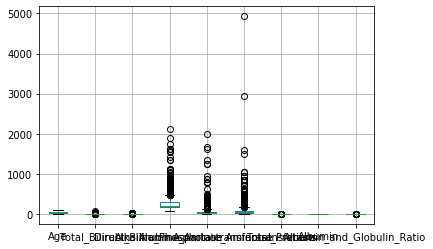

In [23]:
df_rev.boxplot()

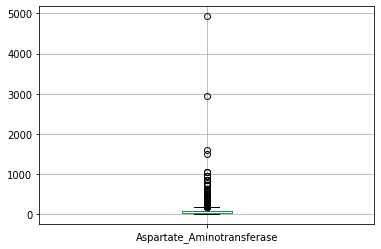

In [24]:
df_rev.boxplot(column='Aspartate_Aminotransferase')

In [25]:
df_rev.shape

(583, 11)

In [26]:
#for value in colname:
q1 = df_rev['Aspartate_Aminotransferase'].quantile(0.25) #first quartile value
q3 = df_rev['Aspartate_Aminotransferase'].quantile(0.75) # third quartile value
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range

In [27]:
df_include = df_rev.loc[(df_rev['Aspartate_Aminotransferase'] >= low) & \
                                (df_rev['Aspartate_Aminotransferase'] <= high)] # meeting the acceptable range
df_exclude = df_rev.loc[(df_rev['Aspartate_Aminotransferase'] < low) | \
                               (df_rev['Aspartate_Aminotransferase'] > high)] #not meeting the acceptable range


In [28]:
df_rev.shape

(583, 11)

In [29]:
print(low)  #-68.0
print(high) #180.0

-68.0
180.0


In [30]:
Aspartate_mean=df_rev.Aspartate_Aminotransferase.mean()
print(Aspartate_mean)

109.91080617495712


In [32]:
#imputing outlier values with mean value
df_exclude.Aspartate_Aminotransferase=Aspartate_mean

In [33]:
#getting back the original shape of df
df_rev=pd.concat([df_include,df_exclude]) #concatenating both dfs to get 
#the original shape
df_rev.shape

(583, 11)

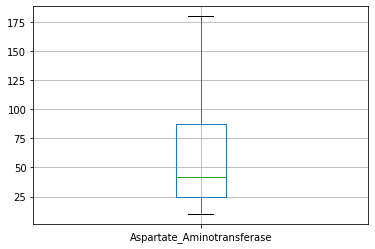

In [34]:
df_rev.boxplot(column='Aspartate_Aminotransferase')

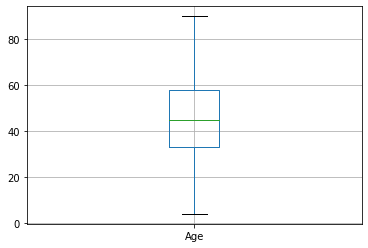

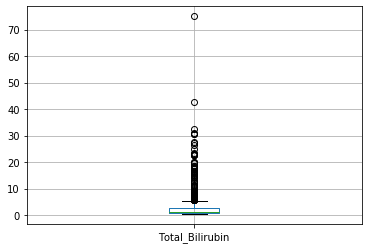

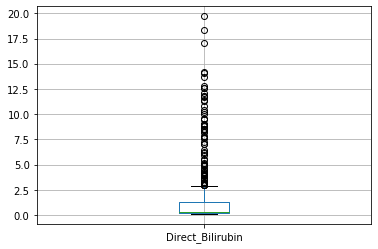

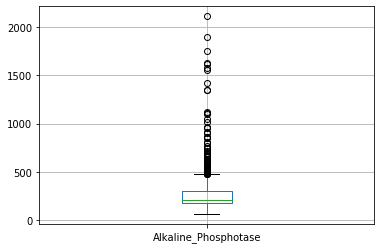

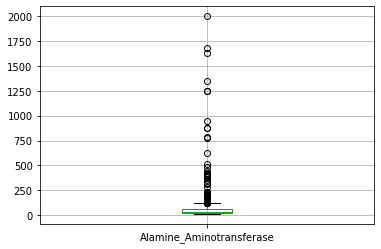

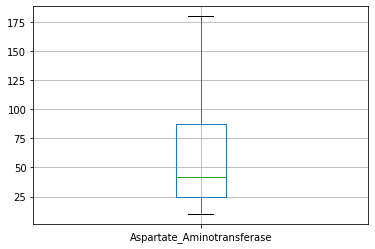

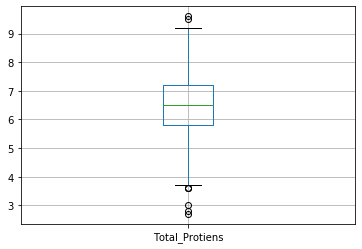

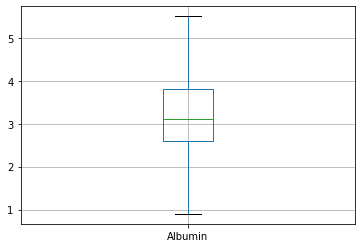

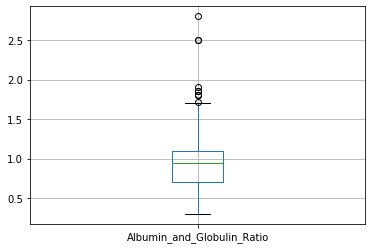

In [35]:
#Checking for Outlier ...
import matplotlib.pyplot as plt
colname=[]
for x in df_rev.columns[:-1]:
    if df_rev[x].dtype=="int64" or df_rev[x].dtype=="float64":
        colname.append(x)

for x in colname:
    df_rev.boxplot(column=x)
    plt.show()
    


#After Detecting outlier's in other features also need to impute them too.....

In [36]:
df_rev.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Class'],
      dtype='object')

In [37]:
#treating outlier one by one....

q1 = df_rev["Total_Bilirubin"].quantile(0.25) #first quartile value
q3 = df_rev["Total_Bilirubin"].quantile(0.75) # third quartile value
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range
df_include = df_rev.loc[(df_rev["Total_Bilirubin"] >= low) & (df_rev["Total_Bilirubin"] <= high)] # meeting the acceptable range
df_exclude = df_rev.loc[(df_rev["Total_Bilirubin"] < low) | (df_rev["Total_Bilirubin"] > high)] #not meeting the acceptable range
x_mean=df_rev.Total_Bilirubin.mean()
#getting back the original shape of df
df_rev=pd.concat([df_include,df_exclude]) #concatenating both dfs to get 


#imputing outlier values with mean value
df_exclude.Total_Bilirubin=x_mean

#getting back the original shape of df
df_rev=pd.concat([df_include,df_exclude]) #concatenating both dfs to get 
#the original shape
df_rev.shape

(583, 11)

In [38]:
#treating outlier :Alkaline_Phosphotase


q1 = df_rev["Alkaline_Phosphotase"].quantile(0.25) #first quartile value
q3 = df_rev["Alkaline_Phosphotase"].quantile(0.75) # third quartile value
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range
df_include = df_rev.loc[(df_rev["Alkaline_Phosphotase"] >= low) & (df_rev["Alkaline_Phosphotase"] <= high)] # meeting the acceptable range
df_exclude = df_rev.loc[(df_rev["Alkaline_Phosphotase"] < low) | (df_rev["Alkaline_Phosphotase"] > high)] #not meeting the acceptable range
x_mean=df_rev.Alkaline_Phosphotase.mean()
#getting back the original shape of df
df_rev=pd.concat([df_include,df_exclude]) #concatenating both dfs to get 

#imputing outlier values with mean value
df_exclude.Alkaline_Phosphotase=x_mean

#getting back the original shape of df
df_rev=pd.concat([df_include,df_exclude]) #concatenating both dfs to get 
#the original shape
df_rev.shape

(583, 11)

In [39]:
#treating outlier :Alamine_Aminotransferase


q1 = df_rev["Alamine_Aminotransferase"].quantile(0.25) #first quartile value
q3 = df_rev["Alamine_Aminotransferase"].quantile(0.75) # third quartile value
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range
df_include = df_rev.loc[(df_rev["Alamine_Aminotransferase"] >= low) & (df_rev["Alamine_Aminotransferase"] <= high)] # meeting the acceptable range
df_exclude = df_rev.loc[(df_rev["Alamine_Aminotransferase"] < low) | (df_rev["Alamine_Aminotransferase"] > high)] #not meeting the acceptable range
x_mean=df_rev.Alamine_Aminotransferase.mean()
#getting back the original shape of df
df_rev=pd.concat([df_include,df_exclude]) #concatenating both dfs to get 

#imputing outlier values with mean value
df_exclude.Alamine_Aminotransferase=x_mean

#getting back the original shape of df
df_rev=pd.concat([df_include,df_exclude]) #concatenating both dfs to get 
#the original shape
df_rev.shape

(583, 11)

In [40]:
#treating outlier :Albumin_and_Globulin_Ratio


q1 = df_rev["Albumin_and_Globulin_Ratio"].quantile(0.25) #first quartile value
q3 = df_rev["Albumin_and_Globulin_Ratio"].quantile(0.75) # third quartile value
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range
df_include = df_rev.loc[(df_rev["Albumin_and_Globulin_Ratio"] >= low) & (df_rev["Albumin_and_Globulin_Ratio"] <= high)] # meeting the acceptable range
df_exclude = df_rev.loc[(df_rev["Albumin_and_Globulin_Ratio"] < low) | (df_rev["Albumin_and_Globulin_Ratio"] > high)] #not meeting the acceptable range
x_mean=df_rev.Albumin_and_Globulin_Ratio.mean()
#getting back the original shape of df
df_rev=pd.concat([df_include,df_exclude]) #concatenating both dfs to get 

#imputing outlier values with mean value
df_exclude.Albumin_and_Globulin_Ratio=x_mean

#getting back the original shape of df
df_rev=pd.concat([df_include,df_exclude]) #concatenating both dfs to get 
#the original shape
df_rev.shape

(583, 11)

In [43]:
#treating outlier :Total_Protiens


q1 = df_rev["Total_Protiens"].quantile(0.25) #first quartile value
q3 = df_rev["Total_Protiens"].quantile(0.75) # third quartile value
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range
df_include = df_rev.loc[(df_rev["Total_Protiens"] >= low) & (df_rev["Total_Protiens"] <= high)] # meeting the acceptable range
df_exclude = df_rev.loc[(df_rev["Total_Protiens"] < low) | (df_rev["Total_Protiens"] > high)] #not meeting the acceptable range
x_mean=df_rev.Albumin_and_Globulin_Ratio.mean()
#getting back the original shape of df
df_rev=pd.concat([df_include,df_exclude]) #concatenating both dfs to get 

#imputing outlier values with mean value
df_exclude.Total_Protiens=x_mean

#getting back the original shape of df
df_rev=pd.concat([df_include,df_exclude]) #concatenating both dfs to get 
#the original shape
df_rev.shape

(583, 11)

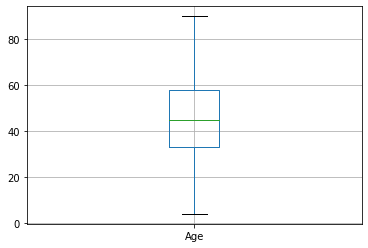

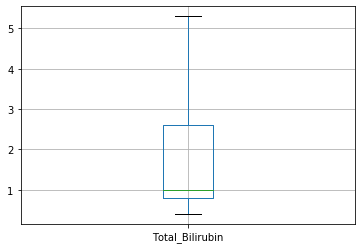

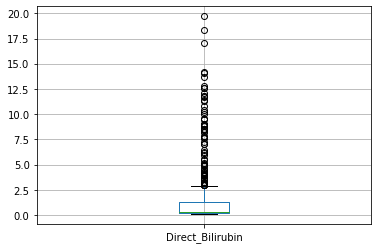

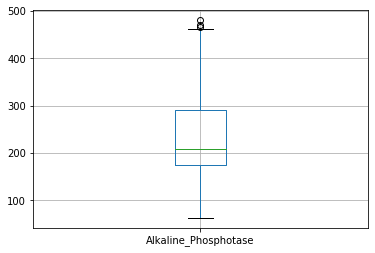

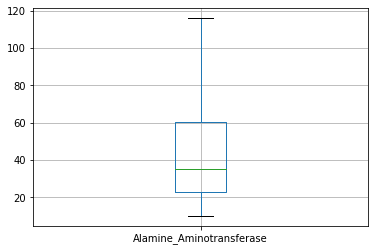

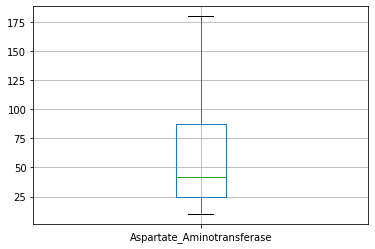

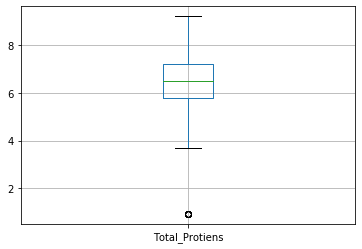

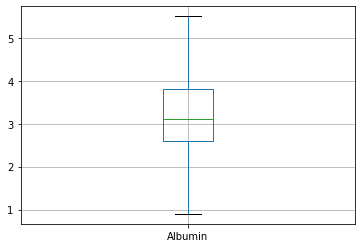

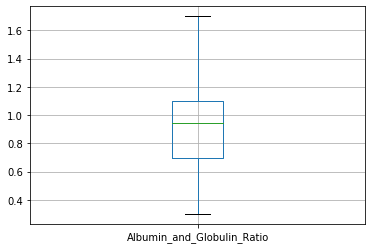

In [44]:
#Generc coe for Outlier detection...
import matplotlib.pyplot as plt
colname=[]
for x in df_rev.columns[:-1]:
    if df_rev[x].dtype=="int64" or df_rev[x].dtype=="float64":
        colname.append(x)

for x in colname:
    df_rev.boxplot(column=x)
    plt.show()
    

In [45]:
df_rev.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Class
0,,,,,,,,,,,
1,65,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.9,No
4,58,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.0,No
5,72,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.4,No
6,46,Male,1.8,0.7,208.0,19.0,14.0,7.6,4.4,1.3,No
7,26,Female,0.9,0.2,154.0,16.0,12.0,7.0,3.5,1.0,No


In [48]:
df_rev.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase          float64
Alamine_Aminotransferase      float64
Aspartate_Aminotransferase    float64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Class                          object
dtype: object

# Label Encoder i.e converting categorical to numberical

In [49]:
colname=[]
for x in df_rev.columns:
    if df_rev[x].dtype=='object':
        colname.append(x)
        
colname 

['Gender', 'Class']

In [50]:
from sklearn import preprocessing

le=preprocessing.LabelEncoder()

for x in colname:
    df_rev[x]=le.fit_transform(df_rev[x])


In [52]:
df_rev.head()
#Gender :Female--->0
        #Male----->1
    
#Class:No--->0
    #:Yes---->1

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Class
0,,,,,,,,,,,
1,65,0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.9,0
4,58,1,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.0,0
5,72,1,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.4,0
6,46,1,1.8,0.7,208.0,19.0,14.0,7.6,4.4,1.3,0
7,26,0,0.9,0.2,154.0,16.0,12.0,7.0,3.5,1.0,0


# Spliting into X and Y

In [55]:
X=df_rev.iloc[:,0:-1]  #Datafame to array  all col rest last one
Y=df_rev.iloc[:,-1]  # Datafame to array   and only last col

In [58]:
#check for shape
X.shape  #(583, 10)
Y.shape  #(583,)

(583,)

In [60]:
Y=Y.astype(int)

Actually Scaling not required but then Gender and Class(dependent) varialbe will consider less significance so....will do scaling

In [59]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaler.fit(X)

X=scaler.transform(X)
print(X)

[[ 1.25209764 -1.76228085 -0.8256188  ...  0.3097939   0.19896867
  -0.10090146]
 [ 0.81935624  0.56744644 -0.56017587 ...  0.3097939   0.32478075
   0.25803399]
 [ 1.68483904  0.56744644  2.0057725  ...  0.72939636 -0.93334003
  -1.89557876]
 ...
 [-1.15889017  0.56744644  1.47382425 ... -4.61792396 -2.82052119
  -2.25451421]
 [ 1.56119864  0.56744644 -0.29473293 ... -4.61792396 -0.55590379
  -0.81877238]
 [ 0.07751384 -1.76228085 -0.20625196 ... -4.61792396 -2.69470911
  -2.25451421]]


In [61]:
from sklearn.model_selection import train_test_split

#sSplit the data into test an train
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

# LogisticRegression

In [62]:
from sklearn.linear_model import LogisticRegression

#create a model object
classifier=LogisticRegression()

#fitting training data to model
classifier.fit(X_train,Y_train)

Y_pred=classifier.predict(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)    #Accuracy=68.57

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the Model:",acc*100)

####Accuracy :  0.6857
####Recall   :  0.94 --->0
####            0.17 --->1

[[110   7]
 [ 48  10]]
Classification report:
              precision    recall  f1-score   support

           0       0.70      0.94      0.80       117
           1       0.59      0.17      0.27        58

    accuracy                           0.69       175
   macro avg       0.64      0.56      0.53       175
weighted avg       0.66      0.69      0.62       175

Accuracy of the Model: 68.57142857142857


Adjusting Threashold

In [63]:
#adjusting the threshold to get Better accuracy with good Recall Value.

y_pred_prob = classifier.predict_proba(X_test)
print(y_pred_prob)

[[8.67919404e-01 1.32080596e-01]
 [9.69360118e-01 3.06398818e-02]
 [5.66040293e-01 4.33959707e-01]
 [6.94917098e-01 3.05082902e-01]
 [7.23193862e-01 2.76806138e-01]
 [5.54033607e-01 4.45966393e-01]
 [6.56689240e-01 3.43310760e-01]
 [8.09191210e-01 1.90808790e-01]
 [9.07541748e-01 9.24582515e-02]
 [8.05921376e-01 1.94078624e-01]
 [7.47864265e-01 2.52135735e-01]
 [5.87554660e-01 4.12445340e-01]
 [9.98057023e-01 1.94297710e-03]
 [7.53291184e-01 2.46708816e-01]
 [9.82143119e-01 1.78568808e-02]
 [9.95030907e-01 4.96909338e-03]
 [6.04352308e-01 3.95647692e-01]
 [8.34200662e-01 1.65799338e-01]
 [6.53775446e-01 3.46224554e-01]
 [9.95892348e-01 4.10765215e-03]
 [9.48563804e-01 5.14361959e-02]
 [5.72112784e-01 4.27887216e-01]
 [6.84448742e-01 3.15551258e-01]
 [6.73962136e-01 3.26037864e-01]
 [7.41350629e-01 2.58649371e-01]
 [9.95712703e-01 4.28729667e-03]
 [5.66389485e-01 4.33610515e-01]
 [9.04416841e-01 9.55831594e-02]
 [9.58025296e-01 4.19747041e-02]
 [5.59144536e-01 4.40855464e-01]
 [4.641495

In [64]:
#Checking for which Threahold fitting model using for Loop

for a in np.arange(0.4,0.61,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :",
    cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.4 : 62  , type 2 error : 38  , type 1 error: 24
Errors at threshold  0.41000000000000003 : 58  , type 2 error : 39  , type 1 error: 19
Errors at threshold  0.42000000000000004 : 57  , type 2 error : 40  , type 1 error: 17
Errors at threshold  0.43000000000000005 : 54  , type 2 error : 40  , type 1 error: 14
Errors at threshold  0.44000000000000006 : 55  , type 2 error : 43  , type 1 error: 12
Errors at threshold  0.45000000000000007 : 55  , type 2 error : 45  , type 1 error: 10
Errors at threshold  0.4600000000000001 : 55  , type 2 error : 45  , type 1 error: 10
Errors at threshold  0.4700000000000001 : 55  , type 2 error : 46  , type 1 error: 9
Errors at threshold  0.4800000000000001 : 55  , type 2 error : 46  , type 1 error: 9
Errors at threshold  0.4900000000000001 : 56  , type 2 error : 48  , type 1 error: 8
Errors at threshold  0.5000000000000001 : 55  , type 2 error : 48  , type 1 error: 7
Errors at threshold  0.5100000000000001 : 57  , type 2 error : 50  ,

Because support is not at all good, trying UPSAMPLING

In [65]:
df_rev.Class.value_counts()

0    416
1    167
Name: Class, dtype: int64

# Performing Upsampling

In [67]:
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = df_rev[df_rev.Class==0]
df_minority = df_rev[df_rev.Class==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
replace=True, # sample with replacement
n_samples=416, # to match majority class
random_state=10) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
df_upsampled.Class.value_counts()

1    416
0    416
Name: Class, dtype: int64

In [68]:
#After Upsampling split data again into X and Y

X=df_upsampled.values[:,:-1]
Y=df_upsampled.values[:,-1]
Y=Y.astype(int)

In [69]:
#Code for Scalings

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)
print(X)

[[ 1.30430146 -1.67304715 -0.73318097 ...  0.29459011  0.11403421
  -0.20268259]
 [ 0.87537703  0.59771179 -0.44370826 ...  0.29459011  0.238544
   0.16321024]
 [ 1.73322589  0.59771179  2.35452801 ...  0.72968195 -1.00655393
  -2.03214677]
 ...
 [-0.96287054 -1.67304715 -0.44370826 ...  0.29459011 -0.13498538
  -0.56857543]
 [-1.39179497  0.59771179 -0.73318097 ...  0.72968195  1.11011255
   0.89499591]
 [ 0.87537703  0.59771179 -0.63669007 ...  1.51284726  1.48364193
   0.52910307]]


In [71]:
#Spliting X and Y to 'X_train,X_test,Y_train,Y_test'

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

In [73]:
#Performing Logistic model on Upsampling Data

from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,Y_train)
Y_pred=classifier.predict(X_test)

#Ploting confusion Metrics

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print("Classification report:")
print(classification_report(Y_test,Y_pred))#recall is accuracy score for individual class. class 0 is called as specificity or TNR, class 1 is called sensitivity or TPR
acc=accuracy_score(Y_test,Y_pred)
print("Accracy of the model:",acc)


####Accuracy :  0.708
####Recall   :  0.61 --->0
####            0.82 --->1

[[79 51]
 [22 98]]
Classification report:
              precision    recall  f1-score   support

           0       0.78      0.61      0.68       130
           1       0.66      0.82      0.73       120

    accuracy                           0.71       250
   macro avg       0.72      0.71      0.71       250
weighted avg       0.72      0.71      0.71       250

Accracy of the model: 0.708


# Decision tree Model with Sampling

In [74]:
from sklearn.tree import DecisionTreeClassifier
model_DecisionTree=DecisionTreeClassifier(criterion="gini",random_state=10)
model_DecisionTree.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

In [75]:
Y_pred=model_DecisionTree.predict(X_test)

In [76]:
#Ploting confusion Metrics

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print("Classification report:")
print(classification_report(Y_test,Y_pred))#recall is accuracy score for individual class. class 0 is called as specificity or TNR, class 1 is called sensitivity or TPR
acc=accuracy_score(Y_test,Y_pred)
print("Accracy of the model:",acc)

####Accuracy :  0.816
####Recall   :  0.69 --->0
####            0.95 --->1


[[ 90  40]
 [  6 114]]
Classification report:
              precision    recall  f1-score   support

           0       0.94      0.69      0.80       130
           1       0.74      0.95      0.83       120

    accuracy                           0.82       250
   macro avg       0.84      0.82      0.81       250
weighted avg       0.84      0.82      0.81       250

Accracy of the model: 0.816


# ExtraTreesClassifier with sampling

In [99]:
from sklearn.ensemble import ExtraTreesClassifier

model=ExtraTreesClassifier(27,random_state=10)
#fit the model on the data and predict the values
model=model.fit(X_train,Y_train)

Y_pred=model.predict(X_test)

 

###############

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(Y_test,Y_pred))
print()
print(accuracy_score(Y_test,Y_pred))
print()
print(classification_report(Y_test,Y_pred))

####Accuracy :  0.90
####Recall   :  0.82 --->0  YES
####            0.99 --->1 NO

[[106  24]
 [  1 119]]

0.9

              precision    recall  f1-score   support

           0       0.99      0.82      0.89       130
           1       0.83      0.99      0.90       120

    accuracy                           0.90       250
   macro avg       0.91      0.90      0.90       250
weighted avg       0.91      0.90      0.90       250



# Random forest with samping

In [79]:
from sklearn.ensemble import RandomForestClassifier

model_RandomForest=RandomForestClassifier(n_estimators=30,random_state=10)

#fit the model on the data and predict the values
model_RandomForest.fit(X_train,Y_train)

Y_pred=model_RandomForest.predict(X_test)


from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(Y_test,Y_pred))
print()
print(accuracy_score(Y_test,Y_pred))
print()
print(classification_report(Y_test,Y_pred))

####Accuracy :  0.86
####Recall   :  0.77 --->0
####            0.96 --->1

[[100  30]
 [  5 115]]

0.86

              precision    recall  f1-score   support

           0       0.95      0.77      0.85       130
           1       0.79      0.96      0.87       120

    accuracy                           0.86       250
   macro avg       0.87      0.86      0.86       250
weighted avg       0.88      0.86      0.86       250



# Neural Network with sampling 

In [106]:
#Implimenting Neural Network

from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=(10,10,10),max_iter=30,early_stopping=False,random_state=10,activation="relu")
mlp.fit(X_train,Y_train)
Y_pred=mlp.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

#Ploting confusion Metrics

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print("Classification report:")
print(classification_report(Y_test,Y_pred))#recall is accuracy score for individual class. class 0 is called as specificity or TNR, class 1 is called sensitivity or TPR
acc=accuracy_score(Y_test,Y_pred)#unneccessary dont prune the model on gud model coz if u do it would affect worse
print("Accracy of the model:",acc)

####Accuracy :  0.68
####Recall   :  0.62 --->0
####            0.74 --->1

[[81 49]
 [31 89]]
Classification report:
              precision    recall  f1-score   support

           0       0.72      0.62      0.67       130
           1       0.64      0.74      0.69       120

    accuracy                           0.68       250
   macro avg       0.68      0.68      0.68       250
weighted avg       0.69      0.68      0.68       250

Accracy of the model: 0.68
